#                  Healthcare Prediction Project

## Objective: The primary goal of this project is to predict an individual's general health status based on various health-related attributes.

#
### Dataset Overview
### The dataset used for this project is related to healthcare prediction. It contains various features that provide information about an individual's health, lifestyle, and medical history. Here are the columns in the dataset and their descriptions:
####
### General_Health (Target Variable):

### Description: This column represents the general health status of an individual. It is categorized into different levels such as 'Good', 'Excellent', 'Very good', 'Fair', and 'Poor'.
### Objective: The goal is to predict this column based on the other features in the dataset.
### Exercise:

### Description: Indicates whether the individual exercises regularly.
### Values: Binary (1 for 'Yes', 0 for 'No').

####
### Heart_Disease:

### Description: Indicates whether the individual has heart disease.
### Values: Binary (1 for 'Yes', 0 for 'No').
####
### Skin_Cancer:

### Description: Indicates whether the individual has had skin cancer.
### Values: Binary (1 for 'Yes', 0 for 'No').
####
### Other_Cancer:

### Description: Indicates whether the individual has had any other type of cancer.
### Values: Binary (1 for 'Yes', 0 for 'No').
####
### Depression:

### Description: Indicates whether the individual has been diagnosed with depression.
### Values: Binary (1 for 'Yes', 0 for 'No').
####
### Diabetes:

### Description: Indicates whether the individual has diabetes.
### Values: Binary (1 for 'Yes', 0 for 'No').
####
### Arthritis:

### Description: Indicates whether the individual has arthritis.
### Values: Binary (1 for 'Yes', 0 for 'No').
####
### Sex:

### Description: Indicates the gender of the individual.
### Values: Binary (1 for 'Male', 0 for 'Female').
####
### Height_(cm):

### Description: The height of the individual in centimeters.
### Values: Continuous numeric values.
####
### Weight_(kg):

### Description: The weight of the individual in kilograms.
### Values: Continuous numeric values.
####
### BMI:

### Description: The Body Mass Index of the individual.
### Values: Continuous numeric values.
####
### Smoking_History:

### Description: Indicates the smoking history of the individual.
### Values: Binary (1 for 'Smoker', 0 for 'Non-Smoker').
####
### Alcohol_Consumption:

### Description: The average amount of alcohol consumed by the individual.
### Values: Continuous numeric values.
####
### Fruit_Consumption:

### Description: The average amount of fruits consumed by the individual per day.
### Values: Continuous numeric values.
####
### Green_Vegetables_Consumption:

### Description: The average amount of green vegetables consumed by the individual per day.
### Values: Continuous numeric values.
####
### FriedPotato_Consumption:

### Description: The average amount of fried potatoes consumed by the individual per day.
### Values: Continuous numeric values.

## Importing all the required variables

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
import warnings

warnings.filterwarnings('ignore')

## Reading the dataset

In [27]:
data=pd.read_csv("CVD_cleaned (1).csv")
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [28]:
data.shape

(308854, 19)

## Understanding the Dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [30]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Most of the columns in our dataset are categorical and for running the algorithms, it is necessary to convert it into numerical format

In [31]:
data['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

### Here we are converting the Checkup column values into a numerica value and storing it into a new column

In [32]:
mapping = {
    'Within the past 2 years': 2,
    'Within the past year': 1,
    '5 or more years ago': 5,
    'Within the past 5 years': 4,
    'Never': 0
}

data['Checkup_new'] = data['Checkup'].map(mapping)
data['Checkup_new'].head()

0    2
1    1
2    1
3    1
4    1
Name: Checkup_new, dtype: int64

### All the columns which are having Yes and No's are converted to 1's and 0's respectively

In [33]:
columns_to_convert = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis','Smoking_History']

data[columns_to_convert] = data[columns_to_convert].applymap(lambda x: 1 if x == 'Yes' else 0)

print(data.tail(10))

       General_Health                  Checkup  Exercise  Heart_Disease  \
308844           Good     Within the past year         1              0   
308845           Good     Within the past year         1              0   
308846      Very Good     Within the past year         0              0   
308847      Very Good      5 or more years ago         0              0   
308848           Good  Within the past 5 years         1              0   
308849      Very Good     Within the past year         1              0   
308850           Fair  Within the past 5 years         1              0   
308851      Very Good      5 or more years ago         1              0   
308852      Very Good     Within the past year         1              0   
308853      Excellent     Within the past year         1              0   

        Skin_Cancer  Other_Cancer  Depression  Diabetes  Arthritis     Sex  \
308844            0             0           0         0          0    Male   
308845            

In [34]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'Male' else 0)

print(data.tail())

data['Age_Category'].unique()

       General_Health                  Checkup  Exercise  Heart_Disease  \
308849      Very Good     Within the past year         1              0   
308850           Fair  Within the past 5 years         1              0   
308851      Very Good      5 or more years ago         1              0   
308852      Very Good     Within the past year         1              0   
308853      Excellent     Within the past year         1              0   

        Skin_Cancer  Other_Cancer  Depression  Diabetes  Arthritis  Sex  \
308849            0             0           0         0          0    1   
308850            0             0           0         1          0    1   
308851            0             0           1         0          0    0   
308852            0             0           0         0          0    1   
308853            0             0           0         0          0    0   

       Age_Category  Height_(cm)  Weight_(kg)    BMI  Smoking_History  \
308849        25-29      

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

### Column indicating the Age Group is being indicated by a numerical median value which is stored in a new column

In [35]:
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80+': 84
}


data['Age_Category_Midpoint'] = data['Age_Category'].map(age_mapping)

print(data.head(10))

  General_Health                  Checkup  Exercise  Heart_Disease  \
0           Poor  Within the past 2 years         0              0   
1      Very Good     Within the past year         0              1   
2      Very Good     Within the past year         1              0   
3           Poor     Within the past year         1              1   
4           Good     Within the past year         0              0   
5           Good     Within the past year         0              0   
6           Fair     Within the past year         1              1   
7           Good     Within the past year         1              0   
8           Fair     Within the past year         0              0   
9           Fair     Within the past year         0              0   

   Skin_Cancer  Other_Cancer  Depression  Diabetes  Arthritis  Sex  ...  \
0            0             0           0         0          1    0  ...   
1            0             0           0         1          0    0  ...   
2   

## Exploratory Data Analysis
### For better understanding of the data, we are finding the correlation between the variables

                              Exercise  Heart_Disease  Skin_Cancer  \
Exercise                      1.000000      -0.096347    -0.003986   
Heart_Disease                -0.096347       1.000000     0.090848   
Skin_Cancer                  -0.003986       0.090848     1.000000   
Other_Cancer                 -0.054388       0.092387     0.150824   
Depression                   -0.084729       0.032526    -0.013014   
Diabetes                     -0.142398       0.181072     0.038580   
Arthritis                    -0.124813       0.153913     0.136178   
Sex                           0.059344       0.072595     0.009678   
Height_(cm)                   0.091618       0.015780     0.006812   
Weight_(kg)                  -0.090144       0.045875    -0.028954   
BMI                          -0.155756       0.042666    -0.037619   
Smoking_History              -0.093295       0.107797     0.032828   
Alcohol_Consumption           0.094959      -0.036569     0.042764   
Fruit_Consumption   

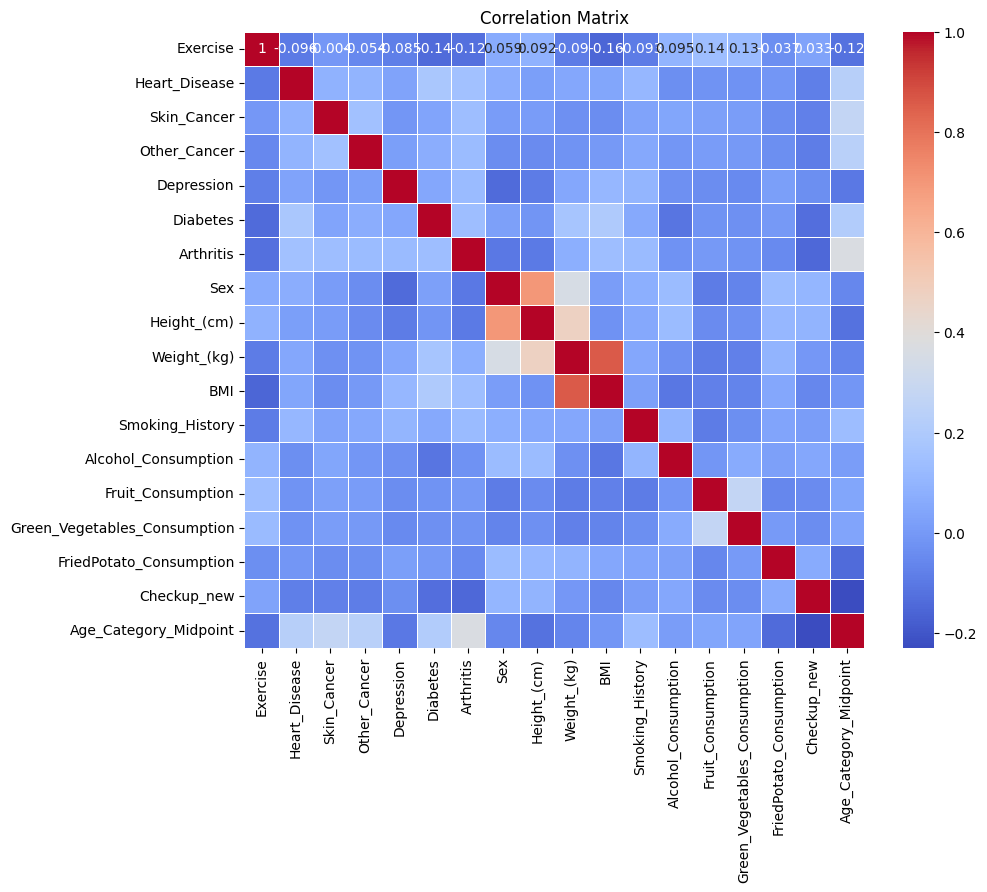

In [36]:
correlation_matrix = data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Various graphs are plotted to better understand the data

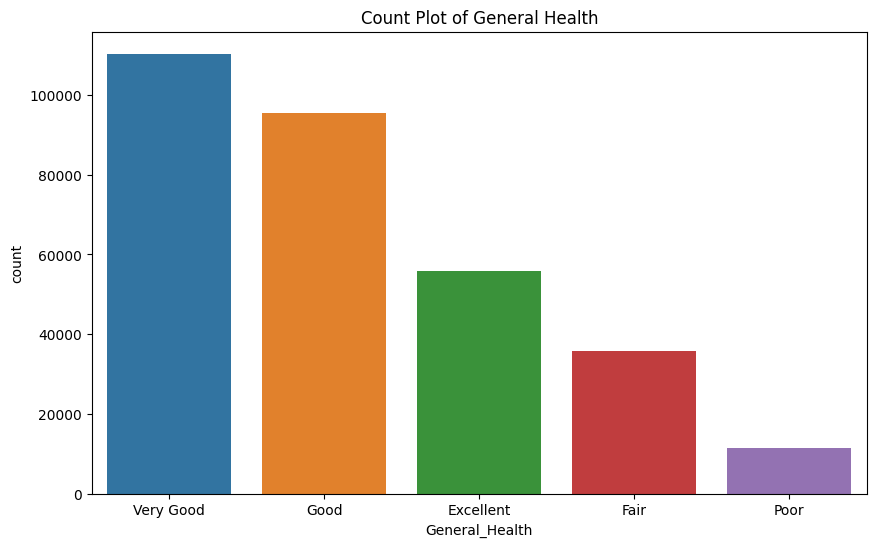

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='General_Health', data=data, order=data['General_Health'].value_counts().index)
plt.title('Count Plot of General Health')
plt.show()

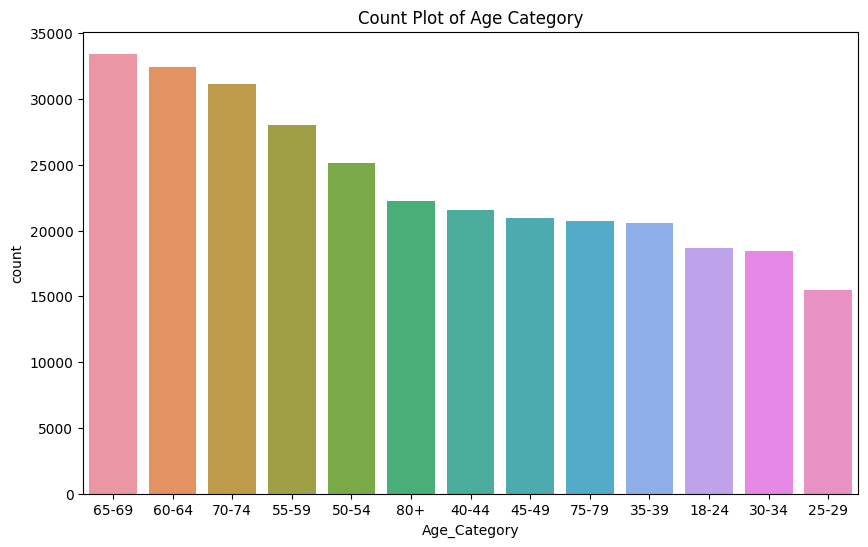

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category', data=data, order=data['Age_Category'].value_counts().index)
plt.title('Count Plot of Age Category')
plt.show()

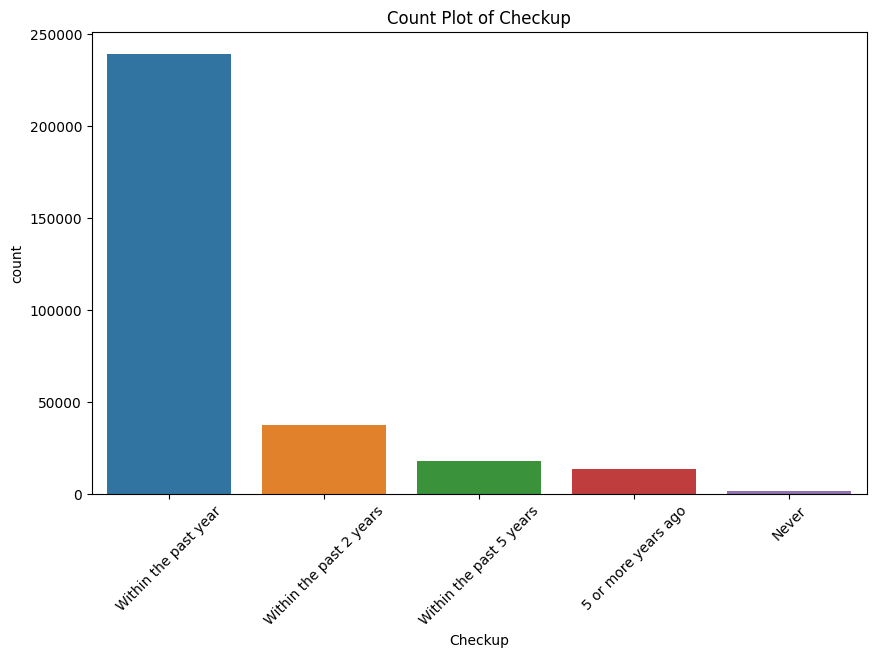

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Checkup', data=data, order=data['Checkup'].value_counts().index)
plt.title('Count Plot of Checkup')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

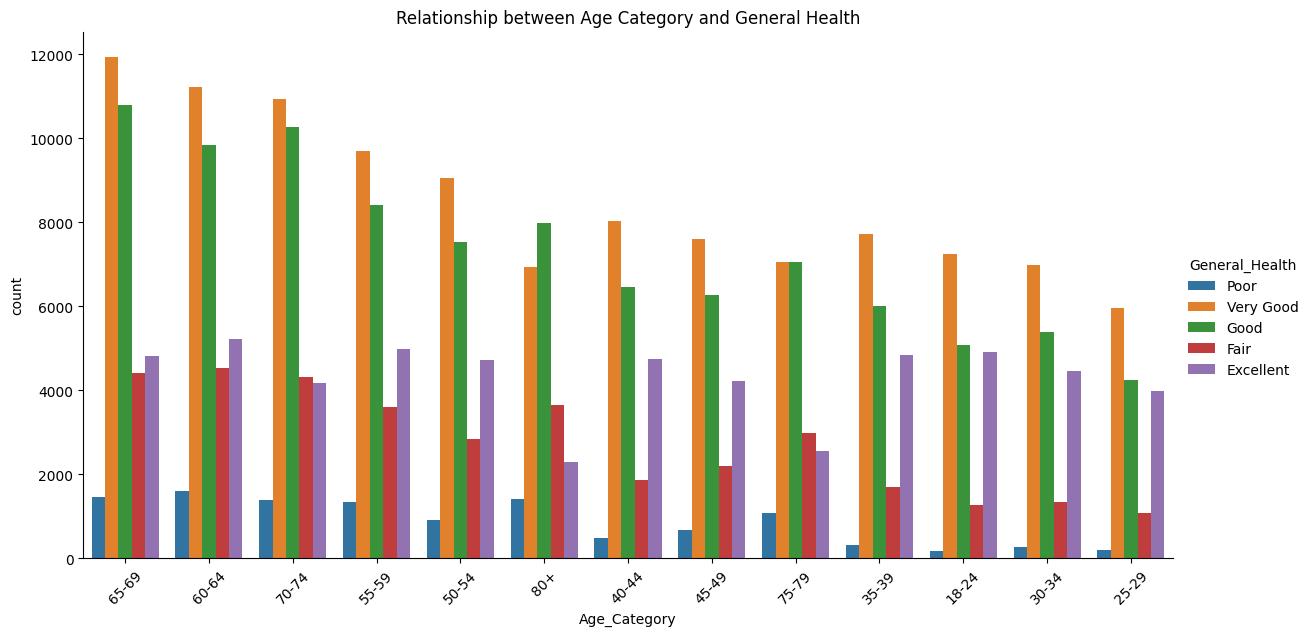

In [40]:
plt.figure(figsize=(14, 8))
sns.catplot(x='Age_Category', hue='General_Health', data=data, kind='count', height=6, aspect=2, order=data['Age_Category'].value_counts().index)
plt.title('Relationship between Age Category and General Health')
plt.xticks(rotation=45)
plt.show()

In [41]:
# sum_of_diseases = data[['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']].sum(axis=1)

# # Subtract Exercise from the sum
# data['New_Column'] = sum_of_diseases - data['Exercise']

# print(data)

# data.head()

In [42]:
health_mapping = {
    'Good': 1,
    'Excellent': 1,
    'Very Good': 1,
    'Fair': 0,
    'Poor': -1
}

# Map the 'General_Health' values to numerical values using the defined mapping
data['Health'] = data['General_Health'].map(health_mapping)

print(data.head())

  General_Health                  Checkup  Exercise  Heart_Disease  \
0           Poor  Within the past 2 years         0              0   
1      Very Good     Within the past year         0              1   
2      Very Good     Within the past year         1              0   
3           Poor     Within the past year         1              1   
4           Good     Within the past year         0              0   

   Skin_Cancer  Other_Cancer  Depression  Diabetes  Arthritis  Sex  ...  \
0            0             0           0         0          1    0  ...   
1            0             0           0         1          0    0  ...   
2            0             0           0         1          0    0  ...   
3            0             0           0         1          0    1  ...   
4            0             0           0         0          0    1  ...   

  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0       32.66  14.54                1          

### All the unrequired columns are removed

In [43]:
data = data.drop(['General_Health','Checkup','Age_Category'], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Exercise                      308854 non-null  int64  
 1   Heart_Disease                 308854 non-null  int64  
 2   Skin_Cancer                   308854 non-null  int64  
 3   Other_Cancer                  308854 non-null  int64  
 4   Depression                    308854 non-null  int64  
 5   Diabetes                      308854 non-null  int64  
 6   Arthritis                     308854 non-null  int64  
 7   Sex                           308854 non-null  int64  
 8   Height_(cm)                   308854 non-null  float64
 9   Weight_(kg)                   308854 non-null  float64
 10  BMI                           308854 non-null  float64
 11  Smoking_History               308854 non-null  int64  
 12  Alcohol_Consumption           308854 non-nul

## Random Forest Classifier

In [44]:
X = data.drop(['Health'], axis=1)
y = data['Health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8467466030629094
Classification Report:
              precision    recall  f1-score   support

          -1       0.36      0.07      0.12      3420
           0       0.37      0.10      0.15     10731
           1       0.87      0.98      0.92     78506

    accuracy                           0.85     92657
   macro avg       0.53      0.38      0.40     92657
weighted avg       0.79      0.85      0.80     92657



### Accuracy: 84.67%

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logistic_model = LogisticRegression(random_state=42)  # You might need to adjust max_iter depending on your data
logistic_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8483762694669588
Classification Report:
              precision    recall  f1-score   support

          -1       0.16      0.00      0.00      3420
           0       0.40      0.07      0.12     10731
           1       0.86      0.99      0.92     78506

    accuracy                           0.85     92657
   macro avg       0.47      0.35      0.35     92657
weighted avg       0.78      0.85      0.79     92657



### Accuracy: 84.83%

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predictions on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7624896122257357
Classification Report:
              precision    recall  f1-score   support

          -1       0.15      0.16      0.15      3420
           0       0.20      0.23      0.21     10731
           1       0.88      0.86      0.87     78506

    accuracy                           0.76     92657
   macro avg       0.41      0.42      0.41     92657
weighted avg       0.78      0.76      0.77     92657



### Accuracy: 76.24%


## Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Predictions on the testing set
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7758291332549079
Classification Report:
              precision    recall  f1-score   support

          -1       0.21      0.28      0.24      3420
           0       0.26      0.34      0.29     10731
           1       0.91      0.86      0.88     78506

    accuracy                           0.78     92657
   macro avg       0.46      0.49      0.47     92657
weighted avg       0.81      0.78      0.79     92657



### Accuracy: 77.58%


## AdaBoost Classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.849077781495192
Classification Report:
              precision    recall  f1-score   support

          -1       0.38      0.08      0.13      3420
           0       0.39      0.09      0.15     10731
           1       0.87      0.99      0.92     78506

    accuracy                           0.85     92657
   macro avg       0.55      0.38      0.40     92657
weighted avg       0.79      0.85      0.80     92657



### Accuracy: 84.9%

### We can conclude that the AdaBoost Classifier is the ideal classifier for the project as it produces the best accuracy.

### Some other models have better metrics in other instances and we can opt for the one which is most ideal in our respective cases.

##                  Random Forest : 84.67 %
##          Logistic Regression : 84.83 %
##                     Decision Tree : 76.24 %
##                       Naive Bayes : 77.58 %
##                           AdaBoost : 84.90 %